In [72]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.4f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [73]:
hitters = pd.read_csv('../datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 0]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 0]

X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

# 6.6.1 Ridge Regression

In [74]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

grid = 10 ** np.linspace(10,-2,100)

ridge_model = Ridge(normalize=True)
coefs = []

for a in grid:
    ridge_model.set_params(alpha=a)
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_)

In [75]:
grid[49], 
pd.Series(coefs[49], index=X.columns)

AtBat                     0.0001
Hits                      0.0004
HmRun                     0.0015
Runs                      0.0006
RBI                       0.0007
Walks                     0.0008
                    ...         
League                    0.0011
Division                  0.0151
PutOuts                   0.0000
Assists                   0.0000
Errors                   -0.0000
NewLeague                 0.0002
Length: 19, dtype: float64

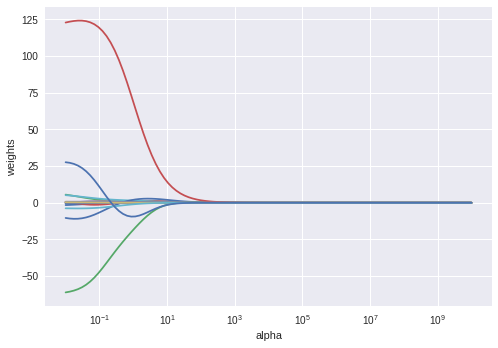

In [63]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [89]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2_fit = ridge2.fit(X_train, y_train)
y_pred2 = ridge2.predict(X_test)

mean_squared_error(y_test, y_pred2)

106216.52238005561

In [90]:
print(pd.Series(ridge2_fit.coef_, index=X.columns))

AtBat                     0.0987
Hits                      0.4461
HmRun                     1.4121
Runs                      0.6608
RBI                       0.8434
Walks                     1.0085
                    ...         
League                   -4.2411
Division                 30.7689
PutOuts                   0.1047
Assists                  -0.0037
Errors                    0.2684
NewLeague                -4.1235
Length: 19, dtype: float64
